In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Data Preparing and Loading
1. Data Can be anything:
    * Exceptionle
    * Images
    * videos
    * Audio
    * DNA
    * Text
2. Machine Learining is:
    * Git data in numerical representation
    * Build a model to learn patterns in the numerical representation.

In [3]:
# Linear Regression formula
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [5]:
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [6]:
len(X), len(y)

(50, 50)

# Splitting Data into Training and testing set.

In [7]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [8]:
(len(X_train), len(y_train)), (len(X_test), len(y_test)) 

((40, 40), (10, 10))

In [61]:
# Plot predictions
def plot_predictions(
    train_data=X_train,
    train_label=y_train,
    test_data=X_test,
    test_label=y_test,
    predictions=None
):
    plt.figure(figsize=(8, 5))

    plt.scatter(X_train, y_train, c="b", s=6, label="Training Data")

    plt.scatter(X_test, y_test, c="g", s=5, label="Testing Data")

    if predictions is not None:
        plt.scatter(X_test, predictions, c="r", s=8, label="Predictions")
    plt.legend(prop={"size":14})

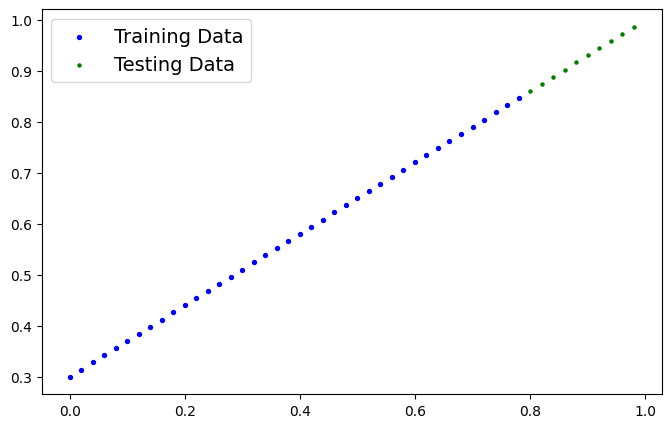

In [10]:
plot_predictions(X_train, y_train, X_test, y_test)

# Build a model
* Our first PyTorch Model, Create `Linear Regression` model class

In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(
            1,
            requires_grad=True,
            dtype=torch.float
        ))
        self.bias = nn.Parameter(torch.randn(
            1,
            requires_grad=True,
            dtype=torch.float
        ))

    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias

# Checking the content of our PyTorch Model

In [12]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
dict(model_0.state_dict())

{'weights': tensor([0.3367]), 'bias': tensor([0.1288])}

## Make Predictions with model

In [14]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [15]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

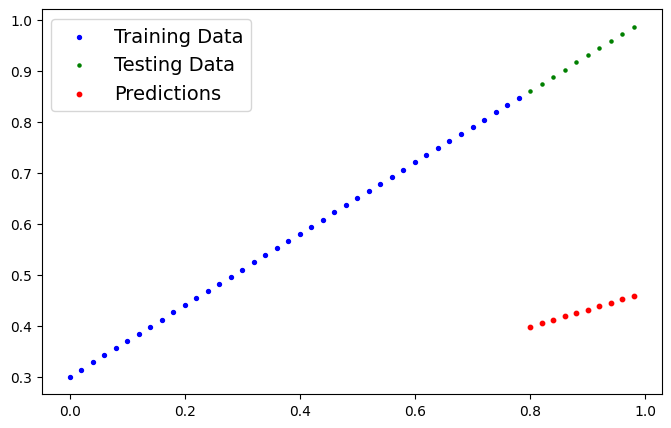

In [16]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

# Train Model
Things we need to train:
* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs.
* **optimizer:** is a function or an algorithm that adjusts the attributes of the neural network, such as weights and learning rates. Thus, it helps in reducing the overall loss and improving accuracy

Specificially for PyTorch we need: 
* A training loop
* A testing loop

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
dict(model_0.state_dict())

{'weights': tensor([0.3367]), 'bias': tensor([0.1288])}

In [19]:
## Set up a Loos Function
loss = torch.nn.L1Loss()

In [20]:
## Set up an optimizer
optimizer = torch.optim.SGD(
    model_0.parameters(),
    lr=0.01,   
)

C:\Users\MBR\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Building a training and testing loop in PyTorch.
1. **Loop through the data**
2. **Forward pass** to calculate the predictions on data
3. Calculate the **loss** _compare the predictions to the actual labels_
4. **Optimizer zero grad**
5. **Loss Backward** _move backward through the network to calculate the gradients_ `backpropagation`
6. **Optimizer step** `gradien descent`

In [21]:
torch.manual_seed(42)
epochs = 200

epoch_count = []
train_loss = []
test_loss = []

for epoch in range(epochs):
# Training
    model_0.train()

    # Forward path
    y_pred = model_0(X_train)

    # Calculate loss
    loss_out = loss(y_pred, y_train)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss Backward
    loss_out.backward()

    # Optimizer step
    optimizer.step()
# Testing
    model_0.eval()

    with torch.inference_mode():
        y_pred_test = model_0(X_test)
        loss_test = loss(y_pred_test, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss.append(loss_out.item())
        test_loss.append(loss_test.item())
        print(f"Epoch: {epoch} | Loss: {loss_out} | Test Loss: {loss_test}")
        print(f"Parameters: {dict(model_0.state_dict())}")

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Parameters: {'weights': tensor([0.3406]), 'bias': tensor([0.1388])}
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Parameters: {'weights': tensor([0.3796]), 'bias': tensor([0.2388])}
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Parameters: {'weights': tensor([0.4184]), 'bias': tensor([0.3333])}
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Parameters: {'weights': tensor([0.4512]), 'bias': tensor([0.3768])}
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Parameters: {'weights': tensor([0.4748]), 'bias': tensor([0.3868])}
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Parameters: {'weights': tensor([0.4938]), 'bias': tensor([0.3843])}
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Parameters: {'weights': tensor([0.5116]), 'bias': tensor([0.3788])}
Epoch: 70 | Loss: 0.034760899

In [22]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

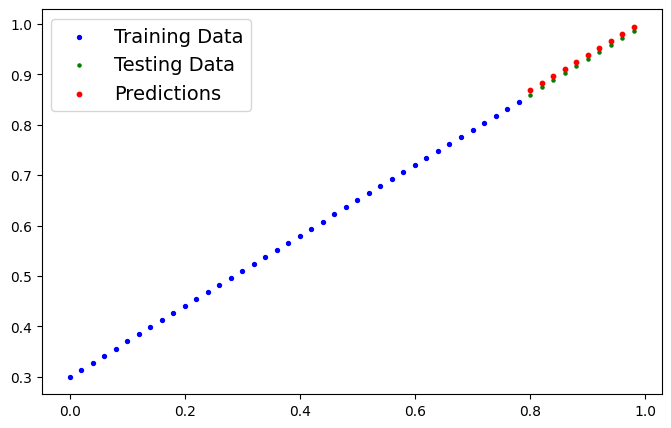

In [23]:
plot_predictions(predictions=y_pred_new)

#### We are now getting closer, it's amazing, wonderful!!

# Plot the Loss Curve

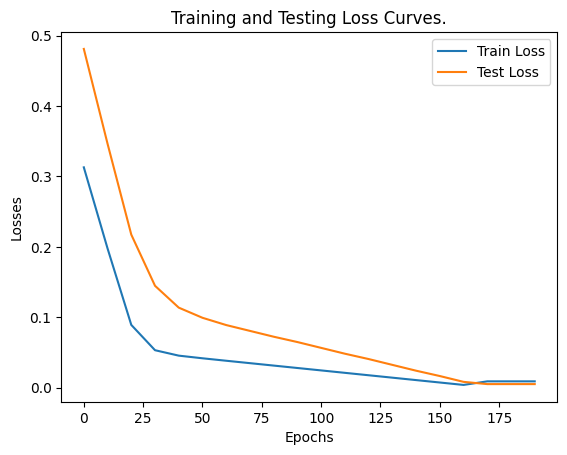

In [24]:
plt.plot(epoch_count, train_loss, label="Train Loss")
plt.plot(epoch_count, test_loss, label="Test Loss")
plt.title("Training and Testing Loss Curves.")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()

# Saving & Loading a model in PyTorch
* There are three main methods you should about for saving and loading models in PyTorch.
    * `torch.save()` Can save any serializable object in Python, including models, tensors, dictionaries, and other data structures.
    * `torch.load()` Allows you to load asaved PyTorch object.
    * `torch.nn.Module.load_state_dict()` Returns a dictionary containing the state of the module, including parameters and persistent buffers

In [27]:
from pathlib import Path

# 1.Create a Direcory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(exist_ok=True, parents=True)

# 2.Create model save path
MODEL_NAME = "pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3.Save the model 
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [28]:
# Instantiate a new instance from the model
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict 
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
dict(loaded_model_0.state_dict())

{'weights': tensor([0.6990]), 'bias': tensor([0.3093])}

# Make Some Predictions with our Loaded Model

In [35]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [33]:
y_pred_test

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [42]:
all(loaded_model_preds == y_pred_test)

True

# Putting all together

## Data & Libraries

In [55]:
import torch
from torch import nn
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [108]:
weight = 0.9
bias = 0.1

start = 0
end = 2
step = 0.025

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [112]:
# splitting the data 
splitter_test_ratio = int(0.2 * len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=splitter_test_ratio, shuffle=True)

In [113]:
# Plot predictions
def plot_predictions(
    train_data=X_train,
    train_label=y_train,
    test_data=X_test,
    test_label=y_test,
    predictions=None
):
    plt.figure(figsize=(8, 5))

    plt.scatter(X_train, y_train, c="b", s=6, label="Training Data")

    plt.scatter(X_test, y_test, c="g", s=5, label="Testing Data")

    if predictions is not None:
        plt.scatter(X_test, predictions, c="r", s=8, label="Predictions")
    plt.legend(prop={"size":14})

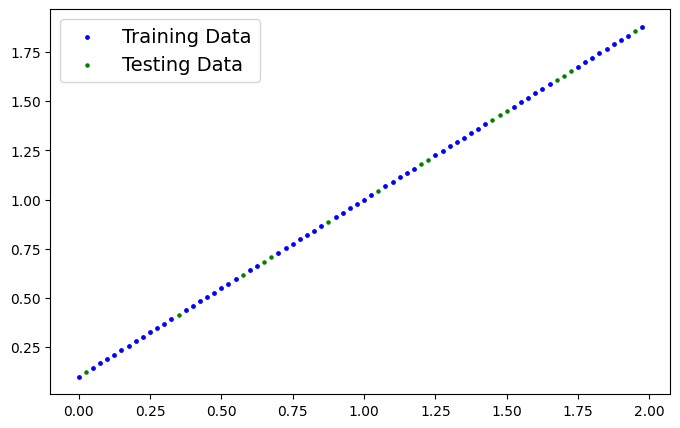

In [114]:
plot_predictions()

## Building the Regression Model

In [115]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=X_train.shape[1], out_features=y_train.shape[1])

    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
dict(model_1.state_dict())

{'linear_layer.weight': tensor([[0.7645]]),
 'linear_layer.bias': tensor([0.8300])}

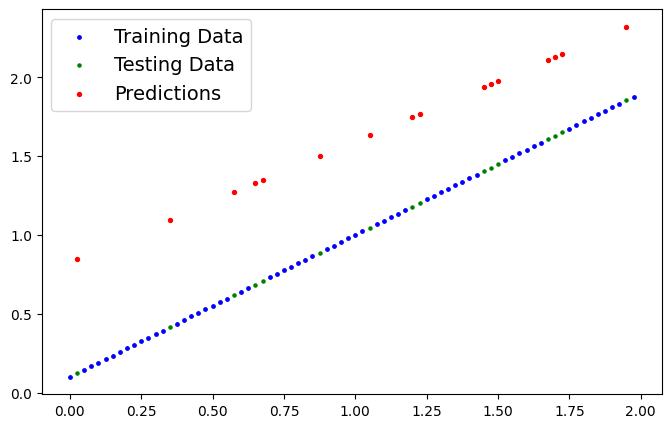

In [116]:
plot_predictions(predictions=model_1(X_test).detach().numpy())

In [117]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

## Training & Evaluations

In [118]:
torch.manual_seed(42)
epochs=200
count_epochs = []
train_losses = []
test_losses = []

for epoch in range(epochs):
    model_1.train()

    y_preds = model_1(X_train)
    train_loss = loss_fn(y_preds, y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model_1.eval()
    
    with torch.inference_mode():
        test_preds = model_1(X_test)
        test_loss = loss_fn(test_preds, y_test)

    if epoch % 10 == 0:
        count_epochs.append(epoch)
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())

        print(f"Epoch: {epoch} | Loss: {train_loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.6011078357696533 | Test Loss: 0.5560026168823242
Epoch: 10 | Loss: 0.41056063771247864 | Test Loss: 0.3483569622039795
Epoch: 20 | Loss: 0.2493007779121399 | Test Loss: 0.18434558808803558
Epoch: 30 | Loss: 0.20846132934093475 | Test Loss: 0.16161830723285675
Epoch: 40 | Loss: 0.19052410125732422 | Test Loss: 0.15532764792442322
Epoch: 50 | Loss: 0.17779675126075745 | Test Loss: 0.14674076437950134
Epoch: 60 | Loss: 0.1658058613538742 | Test Loss: 0.13711519539356232
Epoch: 70 | Loss: 0.15383291244506836 | Test Loss: 0.1274896264076233
Epoch: 80 | Loss: 0.14185993373394012 | Test Loss: 0.11825428903102875
Epoch: 90 | Loss: 0.12988698482513428 | Test Loss: 0.10913030803203583
Epoch: 100 | Loss: 0.11791402101516724 | Test Loss: 0.10042603313922882
Epoch: 110 | Loss: 0.10599865019321442 | Test Loss: 0.09041351079940796
Epoch: 120 | Loss: 0.09410832077264786 | Test Loss: 0.08013931661844254
Epoch: 130 | Loss: 0.08221795409917831 | Test Loss: 0.0698651373386383
Epoch: 140

## Making Predictions (_inference_)

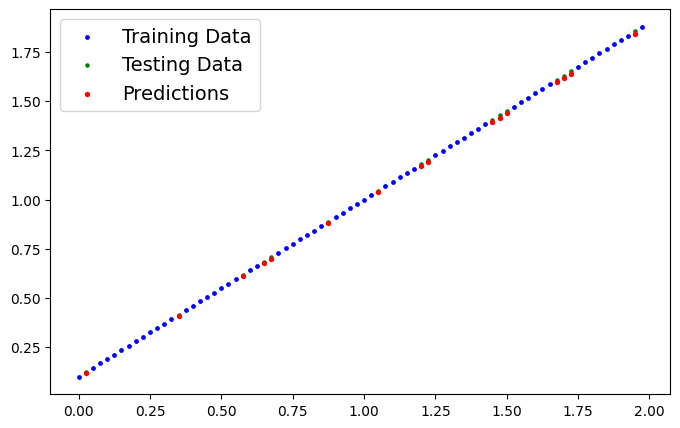

In [128]:
model_1.eval()
with torch.inference_mode():
    predictions = model_1(X_test)
    
plot_predictions(predictions=predictions.detach().numpy())

In [121]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8947]])),
             ('linear_layer.bias', tensor([0.0966]))])

In [122]:
weight, bias

(0.9, 0.1)

## Saving & Loading a model

In [123]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(exist_ok=True, parents=True)

MODEL_NAME = "pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

In [124]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [131]:
loaded_model_1.eval()

with torch.inference_mode(): 
    loaded_model_1_preds = loaded_model_1(X_test)

all(loaded_model_1_preds == predictions)

True